In [11]:
import math
import json
import requests
import itertools
import numpy as np
import time
from datetime import datetime, timedelta
import pymongo
from pymongo import MongoClient
import praw
import pprint

In [12]:
reddit = praw.Reddit(client_id='TADWcvi74CnuJg',
                     client_secret='BvPg9JgtZlFHO3L0x5mQdsBGU-0',user_agent='depreshow' 
#                    ,password=reddit_pass, username=reddit_user   ---ADICIONE A LINHA PARA SAIR DO MODO READONLY
                    )
print(reddit.read_only)

True


In [13]:
db_client = MongoClient('localhost', 27017)

db_icc = db_client.icc
db_icc_posts = db_icc.posts
db_icc_comments = db_icc.comments

db_icd = db_client.icd
db_icd_posts = db_icd.posts
db_icd_comments = db_icd.comments
db_icd_users = db_icd.users

## Copiando Posts

In [7]:
BATCH_SIZE = 100000
cursor = db_icc_posts.find({}).batch_size(BATCH_SIZE)
counter = 0
while cursor.alive:
    batch = []
    while len(batch)<BATCH_SIZE and cursor.alive:
        tmp = next(cursor)  
        batch += [tmp]
    counter += BATCH_SIZE
    db_icd_posts.insert_many(batch)
    print(counter)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000


## Copiando Comentarios

In [10]:
BATCH_SIZE = 100000
cursor = db_icc_comments.find({}).batch_size(BATCH_SIZE)
counter = 0
while cursor.alive:
    batch = []
    while len(batch)<BATCH_SIZE and cursor.alive:
        tmp = next(cursor)  
        batch += [tmp]
    counter += BATCH_SIZE
    db_icd_comments.insert_many(batch)
    print(counter)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000


# Listando Usuarios

In [6]:
authors = set()
cursor = db_icd_posts.find({},{'author_fullname':1})
for author in cursor:
    authors.add(author['author_fullname'])
print(len(authors))
cursor = db_icd_comments.find({},{'author_fullname':1})
for author in cursor:
    authors.add(author['author_fullname'])
print(len(authors))
authors.remove(None)
print(len(authors))


225735
415775


In [13]:
db_icd_posts.create_index('author_fullname')
db_icd_comments.create_index('author_fullname')

'author_fullname_1'

In [23]:
authors_list = list(authors)

In [24]:
%%time
BATCH_SIZE = 1000
counter = 0
erros = []
batch = []

for user_id in authors_list:
    try:
        posts = []
        comments = []
        for a in db_icd_posts.find({'author_fullname':user_id}):
            posts += [a['_id']]
        for a in db_icd_comments.find({'author_fullname':user_id}):
            comments += [a['_id']]
        usuario = dict()
        usuario['_id'] = user_id
        usuario['posts_id'] = posts
        usuario['num_posts'] = len(posts)
        usuario['comments_id'] = comments
        usuario['num_comments'] = len(comments)
        if(len(batch)<BATCH_SIZE):
            batch +=[usuario]
        else:
            db_icd_users.insert_many(batch)
            batch = []
        counter+=1
        if(counter%1000 ==0):
            print(counter)
    except:
        print("erro")
        erros +=[(user_id,batch)]
db_icd_users.insert_many(batch)



1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [150]:
numero_posts = []
numero_comentarios = []
numero_comentarios_posts = []
for a in db_icd_users.find():
    numero_posts +=[a['num_posts']]
    numero_comentarios +=[a['num_comments']]
    numero_comentarios_posts += [a['num_posts'] + a['num_comments']]
numero_posts = np.array(numero_posts)
numero_comentarios = np.array(numero_comentarios)
numero_comentarios_posts = np.array(numero_comentarios_posts)

In [152]:
comentarios_hist, _ = np.histogram(numero_comentarios,50)
posts_hist, _ = np.histogram(numero_posts, 50)
total_hist, _ = np.histogram(numero_comentarios_posts,50)

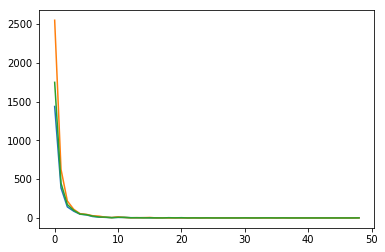

In [155]:
plt.plot(comentarios_hist[1:])
plt.plot(posts_hist[1:])
plt.plot(total_hist[1:])

In [161]:
np.histogram(numero_comentarios_posts, numero_comentarios_posts.max())

(array([234168,  65191,  31211, ...,      0,      0,      1]),
 array([1.00000000e+00, 1.99967148e+00, 2.99934297e+00, ...,
        3.04200066e+03, 3.04300033e+03, 3.04400000e+03]))

In [148]:
total_hist

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [125]:
np.mean(y[1:])

75.6734693877551

In [19]:
import matplotlib.pyplot as plt

In [131]:
l = 1/75
a = [l*np.exp(-l*x) for x in np.linspace(0,50,50)]

In [132]:
a

[0.013333333333333334,
 0.013153155913722863,
 0.012975413286802703,
 0.012800072550473038,
 0.012627101247250208,
 0.01245646735825848,
 0.012288139297302998,
 0.01212208590502284,
 0.01195827644312308,
 0.011796680588684785,
 0.011637268428551922,
 0.011480010453794107,
 0.011324877554244167,
 0.011171841013109546,
 0.011020872501656509,
 0.010871944073966173,
 0.01072502816176143,
 0.010580097569303743,
 0.01043712546835893,
 0.010296085393230956,
 0.01015695123586285,
 0.010019697241003812,
 0.009884298001441647,
 0.009750728453299594,
 0.00961896387139675,
 0.009488979864671152,
 0.00936075237166474,
 0.009234257656069302,
 0.009109472302332642,
 0.00898637321132409,
 0.008864937596058612,
 0.008745142977478686,
 0.008626967180293179,
 0.00851038832887247,
 0.008395384843199023,
 0.008281935434872687,
 0.008170019103169994,
 0.008059615131156689,
 0.007950703081852788,
 0.007843262794449496,
 0.007737274380577189,
 0.007632718220623895,
 0.007529574960103456,
 0.007427825506072827

In [75]:
np.exp(1)

2.718281828459045

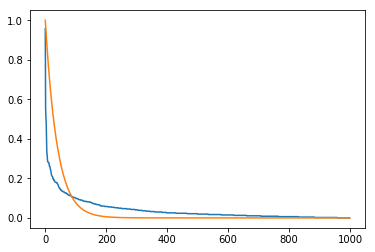

In [94]:
numero_posts = np.array(numero_posts)
plt.plot((numero_posts - np.min(numero_posts))/np.max(numero_posts))
plt.plot(a/np.max(a))

In [ ]:
n

In [89]:
np.max(numero_posts)

467

In [5]:
pl%config IPCompleter.greedy=True

In [50]:
posts_numbers +=1
posts_numbers.denominator

array([], dtype=float64)

In [53]:
import IPython
print(IPython.sys_info())


{'commit_hash': '8c47bbcb3',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/usr/local/lib/python3.6/dist-packages/IPython',
 'ipython_version': '7.5.0',
 'os_name': 'posix',
 'platform': 'Linux-4.18.0-25-generic-x86_64-with-Ubuntu-18.04-bionic',
 'sys_executable': '/usr/bin/python3',
 'sys_platform': 'linux',
 'sys_version': '3.6.8 (default, Jan 14 2019, 11:02:34) \n'
                '[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]'}
